In [ ]:
# Name - Nalawade Prafulla Chandrashekhar.
# Class - BE Artificial Intelligence and Data Science.
# Roll No. - 42
# Practical No. 06 - Implementation of Clonal selection algorithm using Python.

In [1]:
# Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Define the Objective Function

In [4]:
def objective_function(x):
    return x**2 + 3*x + 5  # Example function to minimize


In [5]:
# Initialize Population

In [6]:
def initialize_population(size, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, size)


In [7]:
# Evaluate Affinity (Fitness)

In [8]:
def evaluate_fitness(population):
    return 1 / (1 + objective_function(population))  # Inverse for minimization


In [9]:
# Select Best Antibodies

In [10]:
def select_best(population, fitness, num_best):
    sorted_indices = np.argsort(-fitness)  # Descending order
    return population[sorted_indices[:num_best]]


In [11]:
# Clone Selected Antibodies

In [12]:
def clone_population(best_population, num_clones):
    clones = np.repeat(best_population, num_clones)
    return clones


In [13]:
# Hypermutation (Random Mutation)

In [14]:
def mutate(clones, mutation_rate):
    mutation = np.random.uniform(-mutation_rate, mutation_rate, size=clones.shape)
    return clones + mutation


In [15]:
# Replace Worst Solutions

In [16]:
def replace_worst(population, new_population, num_replace):
    population[-num_replace:] = new_population[:num_replace]
    return population


In [17]:
#  Implement the Clonal Selection Algorithm

In [18]:
def clonal_selection_algorithm(pop_size=20, generations=50, num_best=5, num_clones=3, mutation_rate=0.1):
    lower_bound, upper_bound = -10, 10
    population = initialize_population(pop_size, lower_bound, upper_bound)
    
    best_fitness_history = []
    
    for generation in range(generations):
        fitness = evaluate_fitness(population)
        best_population = select_best(population, fitness, num_best)
        clones = clone_population(best_population, num_clones)
        mutated_clones = mutate(clones, mutation_rate)
        
        fitness_mutated = evaluate_fitness(mutated_clones)
        best_mutated = select_best(mutated_clones, fitness_mutated, num_best)
        
        population = replace_worst(population, best_mutated, num_best)
        
        best_fitness_history.append(np.max(fitness))
        
        if generation % 10 == 0:
            print(f"Generation {generation}: Best fitness = {np.max(fitness)}")
    
    return best_fitness_history, population


In [19]:
# Run the Algorithm

In [20]:
best_fitness, final_population = clonal_selection_algorithm()


Generation 0: Best fitness = 0.26660294930658407
Generation 10: Best fitness = 0.2666665928732328
Generation 20: Best fitness = 0.2666527224685652
Generation 30: Best fitness = 0.2666666506484063
Generation 40: Best fitness = 0.26666659323999936


In [21]:
# Plot the Results

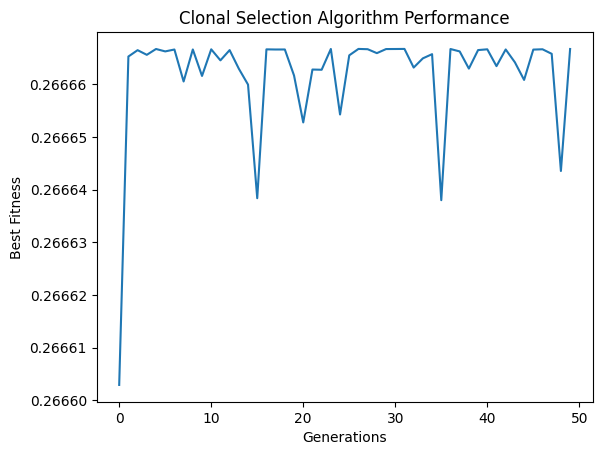

In [22]:
plt.plot(best_fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Clonal Selection Algorithm Performance')
plt.show()
